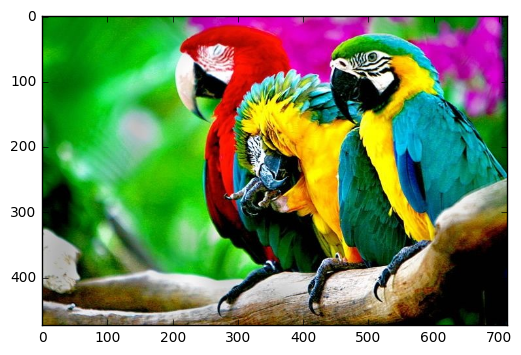

In [8]:
from skimage.io import imread
image = imread('parrots.jpg')
import pylab
%matplotlib inline
pylab.imshow(image)

In [9]:
import skimage
import pandas as pd
import numpy as np
norm_image = skimage.img_as_float(image=image)
data = np.reshape(norm_image, (image.shape[0]*image.shape[1], 3))
data = pd.DataFrame(data=data)
print(data[:3])

          0         1         2
0  0.011765  0.490196  0.015686
1  0.011765  0.490196  0.015686
2  0.007843  0.494118  0.007843


In [22]:
from sklearn.cluster import KMeans
clf = KMeans(init='k-means++', random_state=241, n_clusters=8)
clusters = clf.fit(data.values, data.index)
labels = clusters.labels_
clustered_data = data.copy()
clustered_data['cluster'] = labels
print(clustered_data[:3])

          0         1         2  cluster
0  0.011765  0.490196  0.015686        0
1  0.011765  0.490196  0.015686        0
2  0.007843  0.494118  0.007843        0


In [23]:
mean_cluster = clustered_data.groupby('cluster').mean().values
median_cluster = clustered_data.groupby('cluster').median().values
mean_data = [mean_cluster[cluster] for cluster in clustered_data['cluster'].values]
med_data = [median_cluster[cluster] for cluster in clustered_data['cluster'].values]
med_image = np.reshape(med_data, (image.shape[0], image.shape[1], 3))
mean_image = np.reshape(mean_data, (image.shape[0], image.shape[1], 3))

In [24]:
import math
def psnr(image1, image2):
    mse = np.mean(np.square(image1 - image2))
    res = -10 * math.log10(mse)
    return res
print(psnr(norm_image, med_image))
print(psnr(norm_image, mean_image))

18.20340250001179
18.503942608081672


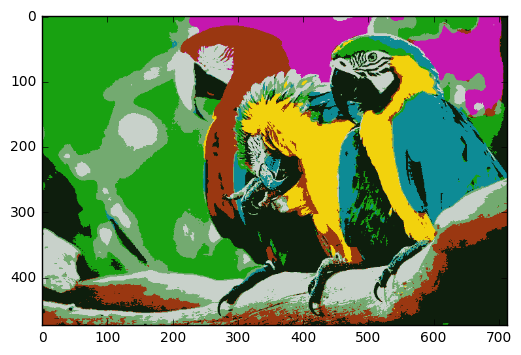

In [25]:
pylab.imshow(mean_image)

In [64]:
min_clustr = 21
a = []
for i in range(1, 21):
    clf = KMeans(init='k-means++', random_state=241, n_clusters=i)
    clusters = clf.fit(data.values, data.index)
    labels = clusters.labels_
    clustered_data = data.copy()
    clustered_data['cluster'] = labels
    mean_cluster = clustered_data.groupby('cluster').mean().values
    median_cluster = clustered_data.groupby('cluster').median().values
    mean_data = [mean_cluster[cluster] for cluster in clustered_data['cluster'].values]
    med_data = [median_cluster[cluster] for cluster in clustered_data['cluster'].values]
    med_image = np.reshape(med_data, (image.shape[0], image.shape[1], 3))
    mean_image = np.reshape(mean_data, (image.shape[0], image.shape[1], 3))
    a.append(mean_image)
    print(i, psnr(norm_image, med_image), psnr(norm_image, mean_image))
    if min_clustr == 21 and (psnr(norm_image, med_image) > 20 or psnr(norm_image, mean_image)>20):
        min_clustr = i
print(min_clustr)

1 9.5197730028653 9.884140319941684
2 11.760614937019689 12.173723878039976
3 12.71818603204878 13.238798259533294
4 14.083549715685283 14.437422898932319
5 15.280793535480006 15.616672143954792
6 16.134562730876954 16.629130559716778
7 17.420858243540785 17.720881923516096
8 18.20340250001179 18.503942608081672
9 18.889838259650553 19.186149976242827
10 19.46367196055432 19.71514637528226
11 19.92430773800949 20.203568551352266
12 20.385882284256294 20.675124664340068
13 20.881040004284976 21.098893930869814
14 21.20126984912058 21.404410508563416
15 21.486274932293313 21.683869070507903
16 21.7527840600817 21.94084863341406
17 21.99948984700326 22.202217065951576
18 22.204682011173446 22.411561321371206
19 22.434582463479323 22.59825346600337
20 22.634133583120423 22.787474033994158
11


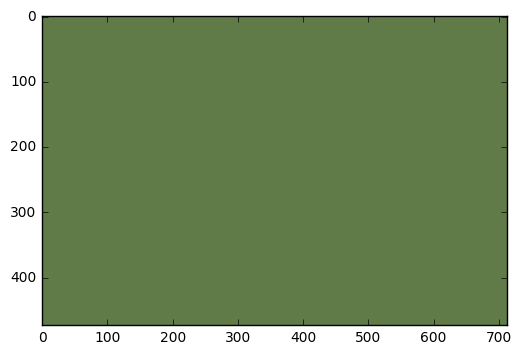

In [65]:
pylab.imshow(a[0])

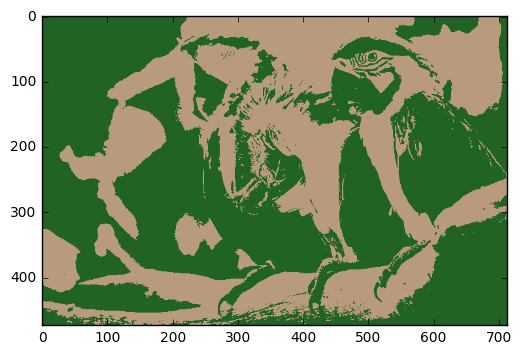

In [66]:
pylab.imshow(a[1])

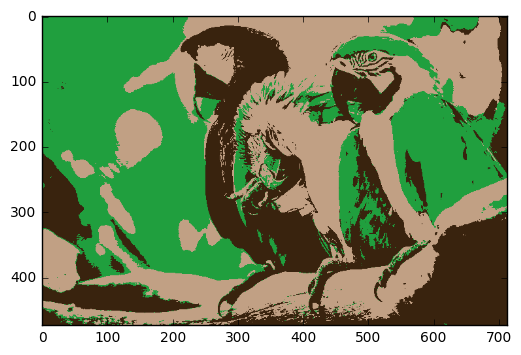

In [67]:
pylab.imshow(a[2])

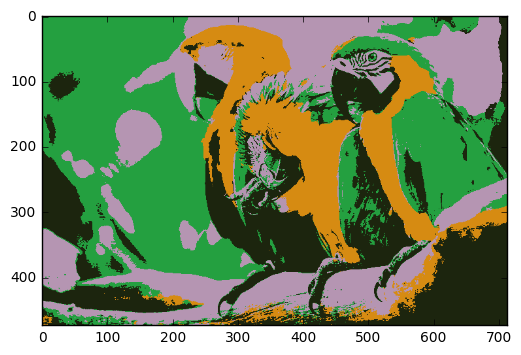

In [68]:
pylab.imshow(a[3])

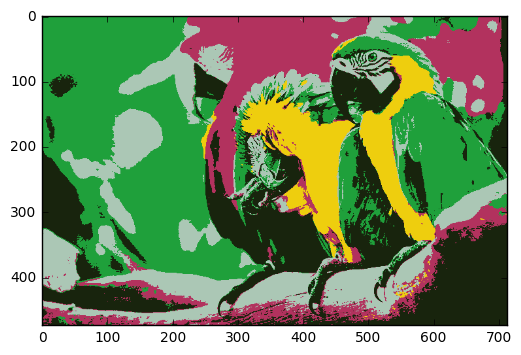

In [69]:
pylab.imshow(a[4])

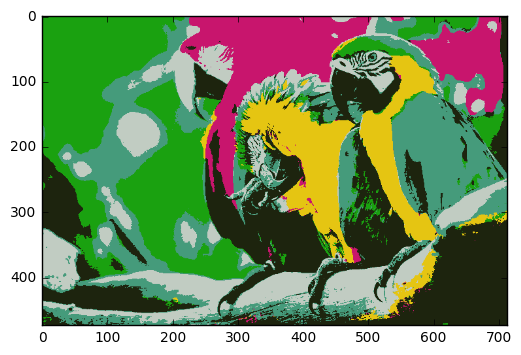

In [70]:
pylab.imshow(a[5])

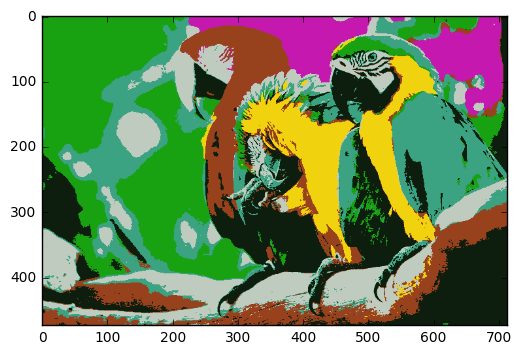

In [71]:
pylab.imshow(a[6])

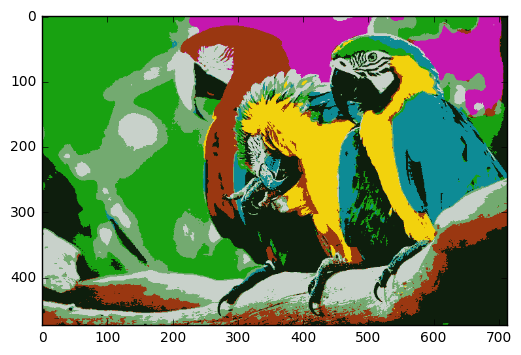

In [72]:
pylab.imshow(a[7])

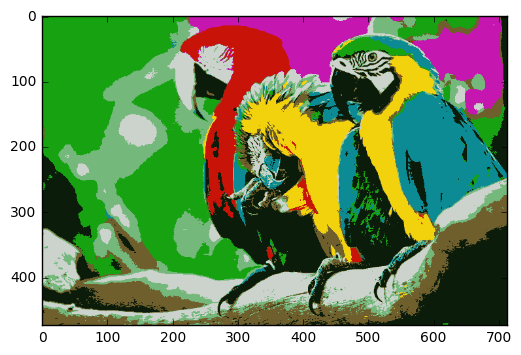

In [73]:
pylab.imshow(a[8])

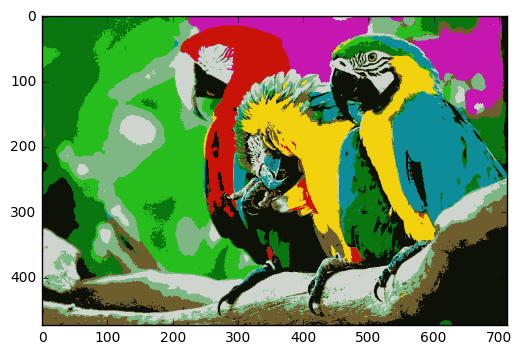

In [74]:
pylab.imshow(a[9])

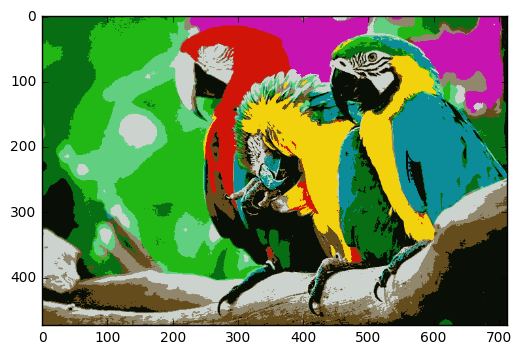

In [75]:
pylab.imshow(a[10])

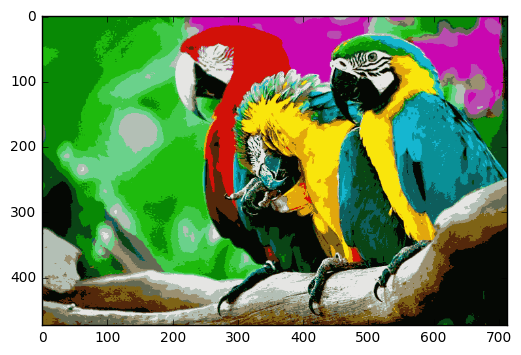

In [76]:
pylab.imshow(a[19])